# Books Recommender System

## Loading the Data
The book data used in this notebook was collected form Kaggle - https://www.kaggle.com/datasets/ra4u12/bookrecommendation?select=BX-Books.csv, that has three files namely BX-Book-Ratings.csv, BX-Books.csv, BX-Users.csv.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the CSV file into a Pandas DataFrame
books = pd.read_csv('/content/drive/My Drive/book data/BX-Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')


<ipython-input-3-24d4b479ba1f>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('/content/drive/My Drive/book data/BX-Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 

In [ ]:
# Displaying the first few rows of the DataFrame
books.head(5)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.shape

(271360, 8)

In [ ]:
# Show columns in the DataFrame
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

## Data Preprocessing

In [ ]:
# Selecting specific columns from the 'books' DataFrame
# The double square brackets [['...']] are to create a new DataFrame with only the specified columns
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']]


In [ ]:
# Show the first few entries in the books DataFrame
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Renaming columns in the 'books' DataFrame
books.rename(columns={
    "Book-Title": "title",                 # Renaming 'Book-Title' to 'title'
    "Book-Author": "author",               # Renaming 'Book-Author' to 'author'
    "Year-Of-Publication": "year",         # Renaming 'Year-Of-Publication' to 'year'
    "Publisher": "publisher",              # Renaming 'Publisher' to 'publisher'
    "Image-URL-L": "img_url"               # Renaming 'Image-URL-L' to 'img_url'
}, inplace=True)


In [ ]:
# Checking if the changes have been effected by showing the first few data entries
books.head()

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Reading the Users CSV file into a Pandas DataFrame
users =  pd.read_csv('/content/drive/My Drive/book data/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')


<ipython-input-11-fa25f28e5a7e>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users =  pd.read_csv('/content/drive/My Drive/book data/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')


In [ ]:
users.shape

(278858, 3)

In [ ]:
# Reading the Ratings CSV file into a Pandas DataFrame
ratings =  pd.read_csv('/content/drive/My Drive/book data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')


<ipython-input-13-77f4b4b3e815>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings =  pd.read_csv('/content/drive/My Drive/book data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Renaming columns in the 'ratings' DataFrame
ratings.rename(columns={
    "User-ID": "user_id",         # Renaming 'User-ID' to 'user_id'
    "Book-Rating": "rating"       # Renaming 'Book-Rating' to 'rating'
}, inplace=True)


In [ ]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Checking the number of rows and of columns in the DataFrames books, users and ratings
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [ ]:
# Counting the occurrences of each unique user_id in the 'ratings' DataFrame
ratings['user_id'].value_counts()


11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
# Finding the unique user IDs in the 'ratings' DataFrame
ratings['user_id'].unique().shape

(105283,)

In [ ]:
# Creating a boolean Series where each entry indicates whether the user has provided more than 200 ratings
X = ratings["user_id"].value_counts() > 200
# Extracting only the True entries (users with more than 200 ratings) and calculating the number of such users
X[X].shape


(899,)

In [ ]:
# Extracting the index values (user IDs) where the condition is True (users with more than 200 ratings)
y = X[X].index


In [ ]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [ ]:
# Filtering the 'ratings' DataFrame to include only rows where the 'user_id' is in the collection of user IDs stored in 'y'
ratings = ratings[ratings['user_id'].isin(y)]


In [ ]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [ ]:
ratings.shape

(526356, 3)

In [ ]:
# Merging the 'ratings' DataFrame with the 'books' DataFrame based on the common column 'ISBN'
ratings_with_books = ratings.merge(books, on="ISBN")


In [ ]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [ ]:
ratings_with_books.shape

(487671, 8)

In [ ]:
# Grouping the merged DataFrame by 'title' and counting the number of ratings for each book
# The result is stored in a new DataFrame 'num_rating'
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()


In [ ]:
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
# Renaming the 'rating' column in the 'num_rating' DataFrame to 'num_of_ratings'
num_rating.rename(columns = {
    "rating" :"num_of_ratings"}, inplace = True)

In [ ]:
num_rating.head()

,title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
# Merging the 'ratings_with_books' DataFrame with the 'num_rating' DataFrame based on the common column 'title'
rating_data = ratings_with_books.merge(num_rating, on='title')


In [ ]:
rating_data.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [ ]:
rating_data.shape

(487671, 9)

In [ ]:
# Filtering the 'rating_data' DataFrame to include only rows where 'num_of_ratings' is greater than or equal to 50
rating_data = rating_data[rating_data['num_of_ratings'] >= 50]


In [ ]:
rating_data.sample(5)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
39619,269566,0451156609,0,The Tommyknockers,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451156609.0...,98
159762,246655,0373218397,0,Summer Pleasures,Nora Roberts,2002,Silhouette,http://images.amazon.com/images/P/0373218397.0...,56
187129,156467,0440208912,0,Harvest,BELVA PLAIN,1991,Dell,http://images.amazon.com/images/P/0440208912.0...,53
4496,67840,0385504209,10,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,224
103062,49889,0064470598,0,Jacob Have I Loved,Katherine Paterson,1990,HarperTrophy,http://images.amazon.com/images/P/0064470598.0...,51


In [ ]:
rating_data.shape

(61853, 9)

In [ ]:
rating_data.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [ ]:
# Removing duplicate rows in 'rating_data' based on the combination of 'user_id' and 'title'
rating_data.drop_duplicates(['user_id', 'title'], inplace=True)


<ipython-input-40-c5251ff14e54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data.drop_duplicates(['user_id', 'title'], inplace=True)


In [ ]:
rating_data.shape

(59850, 9)

In [ ]:
rating_data

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [ ]:
# Creating a pivot table from 'rating_data'
# Rows: Unique book titles ('title')
# Columns: Unique user IDs ('user_id')
# Values: Ratings ('rating')
book_pivot = rating_data.pivot_table(columns='user_id', index='title', values='rating')


In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.shape

(742, 888)

## Data Transformation

In [ ]:
# Filling missing (NaN) values in 'book_pivot' with zeros
book_pivot.fillna(0, inplace=True)


In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [ ]:
# Importing the csr_matrix class from the scipy.sparse module
from scipy.sparse import csr_matrix

# Converting the 'book_pivot' DataFrame into a sparse matrix
book_sparse = csr_matrix(book_pivot)
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [ ]:
# Importing the NearestNeighbors class from the sklearn.neighbors module
from sklearn.neighbors import NearestNeighbors

# Creating an instance of NearestNeighbors with the 'brute' algorithm
model = NearestNeighbors(algorithm='brute')


In [ ]:
# Fitting the NearestNeighbors model on the sparse matrix 'book_sparse'
model.fit(book_sparse)


NearestNeighbors(algorithm='brute')

In [ ]:
# Finding the distances and indices of the 5 nearest neighbors for the book at row index 237 in 'book_pivot'
distance, suggestion = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1), n_neighbors=5)


In [ ]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333]])

In [ ]:
suggestion

array([[237, 240, 238, 241, 184]])

In [ ]:
# Printing the titles of the suggested nearest neighbor books
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])


Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive'],
      dtype='object', name='title')


In [ ]:
book_names = book_pivot.index
book_names

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [ ]:
model_path = '/content/drive/My Drive/book data/artifacts/model.pkl'
book_names_path = '/content/drive/My Drive/book data/artifacts/book_names.pkl'
rating_data_path = '/content/drive/My Drive/book data/artifacts/rating_data.pkl'
book_pivot_path = '/content/drive/My Drive/book data/artifacts/book_pivot.pkl'


In [ ]:
import pickle
# Save the trained model
pickle.dump(model, open(model_path,'wb'))
pickle.dump(book_names, open(book_names_path,'wb'))
pickle.dump(rating_data, open(rating_data_path,'wb'))
pickle.dump(book_pivot, open(book_pivot_path,'wb'))

In [ ]:
def recommend_book(book_name):
    # Find book ID
    book_id = np.where(book_pivot.index == book_name)[0][0]

    # Find similar books using the loaded model
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=10)

    # Print recommended books
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        print(f"Books similar to '{book_name}':")

        for j in books:
            print(j)



In [ ]:
# Example usage:
book_name = 'You Belong To Me'
recommend_book(book_name)

Books similar to 'You Belong To Me':
You Belong To Me
The Cradle Will Fall
Exclusive
Loves Music, Loves to Dance
While My Pretty One Sleeps
Before I Say Good-Bye
Weep No More My Lady
The Long Road Home
Let Me Call You Sweetheart
No Safe Place


## Model Evaluation

"Online Evaluation" or "Live Testing" of a recommender system is the approach I took to this model's evaluation. This involves testing the recommender system on real users in a live setting, where users interact with the system and provide feedback on the recommendations they receive. This approach is considered more realistic, reliable, and informative compared to offline evaluation methods.

Here is the link to the form used to gather users' feedback:
https://docs.google.com/forms/d/e/1FAIpQLScVlbhsOmFPbqLeB1LtmjcHLamhy_3-pXNZA_GzkyLaLgtZdA/viewform, as well as one showing the responses collected: https://docs.google.com/spreadsheets/d/1li0N45ijux5jDYHKNEdcizu1f5iOZw_a80dV1omu8Ig/edit?usp=sharing

### Data Analysis
The data was collected using a scale of 1 to 5 on relevance and satisfaction of the recommendations given by the app. It was upto the user how many times/ entries they want to test on different names of books before they fill the form.

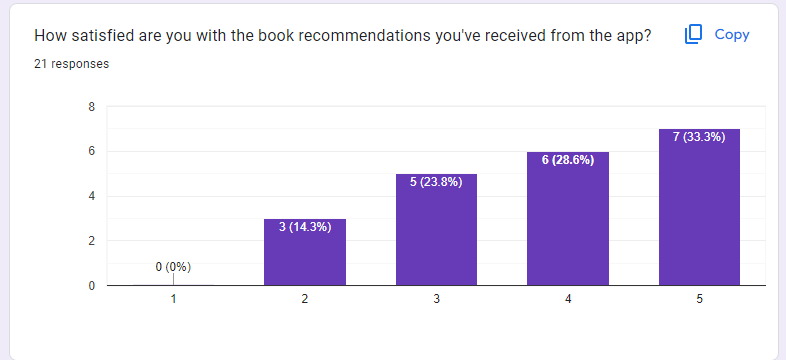

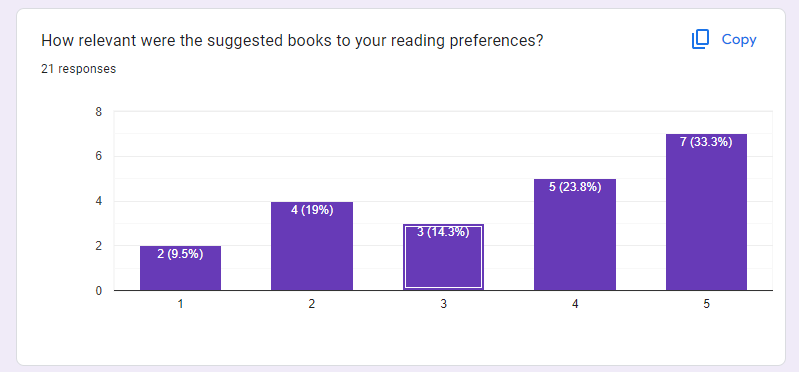

The Charts above show how the testers responded to the question and it is evident that majority were happy with the performace of the mdel. However, there is a noticeable window for improvement.

Even though this method of evaluating recommender systems is recommended, I have to acknoledge that it is not entirely perfect because users' responses are subjective and based on their personal opinions, which can vary widely. Different users may interpret satisfaction differently. Moreso, the data may not be representative of the entire user base. Limited diversity in responses can impact the generalizability of findings.

## Model Optimization

In [ ]:

param_grid = {
    'n_neighbors': [3, 5, 10],
    'metric': ['cosine', 'euclidean'],
}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(book_sparse)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=NearestNeighbors(algorithm='brute'),
             param_grid={'metric': ['cosine', 'euclidean'],
                         'n_neighbors': [3, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Print the best parameters
print("Best Parameters:", best_params)

# Print the best model
print("Best Model:", best_model)

Best Parameters: {'metric': 'cosine', 'n_neighbors': 3}
Best Model: NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=3)


In [ ]:
# Set additional parameters based on the best parameters
additional_params = {
    'n_neighbors': best_params['n_neighbors'],
    'metric': best_params['metric'],
}

# Create a new model with the best parameters and additional parameters
best_model = NearestNeighbors(algorithm='brute', **additional_params)
best_model.fit(book_sparse)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=3)

In [ ]:
best_model_path = '/content/drive/My Drive/book data/artifacts/best_model.pkl'
pickle.dump(best_model, open(best_model_path, 'wb'))


In [ ]:
loaded_best_model = pickle.load(open(best_model_path, 'rb'))


In [ ]:
def recommend_book(book_name):
    # Find book ID
    book_id = np.where(book_pivot.index == book_name)[0][0]

    # Find similar books using the loaded model
    distance, suggestion = best_model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=10)

    # Print recommended books
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        print(f"Books similar to '{book_name}':")

        for j in books:
            print(j)



In [ ]:
# Example usage:
book_name = 'You Belong To Me'
recommend_book(book_name)

Books similar to 'You Belong To Me':
You Belong To Me
Loves Music, Loves to Dance
I'll Be Seeing You
Before I Say Good-Bye
Daddy's Little Girl
The Cradle Will Fall
All Around the Town
While My Pretty One Sleeps
Let Me Call You Sweetheart
My Gal Sunday


After tuning the hyperparameters using the best parameters by Gridsearch, there is a noticeable difference in the books recommended. This shows that there has been a change in the way the tuned model recommends books. And to test how best it performs would be to carry out another Online Evaluation. Overall, it is quite a positive change considering the model was tuned with its best parameters.